This is a CNN implementation for the Fashion MNIST dataset

In [1]:
import numpy as np
import pandas as pd

# Load training images and labels
train_images = np.load("train_images.npy")
train_labels = pd.read_csv('train_labels.csv', sep=',')
train_labels = train_labels.drop(columns=['ID'])
train_labels = np.array(train_labels.values.tolist())

print(train_images.shape)
print(train_labels.shape)


(50000, 28, 28)
(50000, 1)


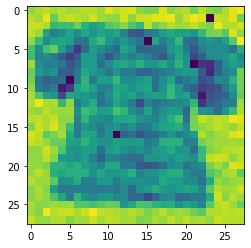

[6]


In [2]:
import matplotlib.pyplot as plt

# Function to show image
def show_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest')
    plt.show()

show_image(train_images[0]) # 0 is the index of the training image you want to display
print(train_labels[0])

In [3]:
# Preprocessing
train_images = train_images/255
train_images = np.expand_dims(train_images, -1)
print(train_images.shape)

(50000, 28, 28, 1)


In [4]:
# Making the train and test data
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels, test_size= 0.2, random_state=2020)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40000, 28, 28, 1)
(10000, 28, 28, 1)
(40000, 1)
(10000, 1)


In [6]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout

# Make CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', data_format='channels_last', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [7]:
# Fit model
model.fit(X_train, y_train, epochs = 20, validation_data=(X_test, y_test))

Epoch 1/20
1250/1250 [==============================] - 28s 22ms/step - loss: 1.2198 - accuracy: 0.5243 - val_loss: 0.6635 - val_accuracy: 0.7445
Epoch 2/20
1250/1250 [==============================] - 27s 22ms/step - loss: 0.8510 - accuracy: 0.6754 - val_loss: 0.6096 - val_accuracy: 0.7731
Epoch 3/20
1250/1250 [==============================] - 27s 22ms/step - loss: 0.7697 - accuracy: 0.7087 - val_loss: 0.5441 - val_accuracy: 0.7884
Epoch 4/20
1250/1250 [==============================] - 27s 22ms/step - loss: 0.7210 - accuracy: 0.7288 - val_loss: 0.5236 - val_accuracy: 0.8008
Epoch 5/20
1250/1250 [==============================] - 27s 22ms/step - loss: 0.6967 - accuracy: 0.7347 - val_loss: 0.5038 - val_accuracy: 0.8123
Epoch 6/20
1250/1250 [==============================] - 27s 22ms/step - loss: 0.6624 - accuracy: 0.7473 - val_loss: 0.4958 - val_accuracy: 0.8121
Epoch 7/20
1250/1250 [==============================] - 27s 22ms/step - loss: 0.6311 - accuracy: 0.7605 - val_loss: 0.4915 -

In [8]:
x_test = np.load('test_images.npy')
x_test = x_test.reshape(len(x_test),28,28,1)
y_test = model.predict(x_test)

df_test = pd.read_csv('sample_submission.csv')
df_test['label'] = y_test
df_test.to_csv('submission.csv', index=False)